<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/Module_08_01_image_filtering_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Convolution and Image Filtering</h1>

In image processing, convolution is the basis of all linear filters. It is the very first step applied when we want to blur, sharpen or detect edges. And yes, it is the same convolution used in state-of-the-art neural networks. In this notebook, you will learn the concept behind convolution, the OpenCV function to implement convolution, and different types of filters.
<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-feature-image.png" alt="c0-m8-feature-image.png">
</center>
<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-convolution.png" alt="c0-m8-convolution.png">
</center>
<br>

### <font style = "color:rgb(50,120,229)">Convolution</font>
A convolution operation requires two inputs, the **input image** and a **kernel**. The input image can be either grayscale or color. For color images, convolution is performed independently on each channel. A convolution kernel is a 2D matrix that is used to filter images, also known as a **convolution matrix**. It is typically a square, MxN matrix, where both M and N are odd integers (e.g., 3×3, 5×5, 7×7, ...). The 3x3 kernel below is referd to as a Box kernel.

$$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

In most cases, we want the sum of the elements in a kernel to sum to one. This ensures that the output image has the same brightness level as the input image. If we do not do this, the output pixels will be approximately 9 times (3x3 = 9) brighter than the input pixels on average. There are no restrictions on entries of the kernel. They can be positive, negative, integers or floating-point numbers.

The output is a **filtered** image. Filtering of a source image is achieved by convolving the kernel with the image. In simple terms, convolution of an image with a kernel represents a simple mathematical operation, between the kernel and its corresponding elements in the image.

### <font style = "color:rgb(50,120,229)">Convolution Workflow</font>

 - Assume that the center of the kernel is positioned over a specific pixel (`p`), in an image.
 - Multiply the value of each element in the kernel with the corresponding pixel element (i.e., its pixel intensity) in the source image.
 - Add the result of those multiplications and compute the average.
 - Replace the value of pixel (`p`), with the calculated average value.


### **<font style = "color:rgb(50,120,229)">Note:</font>**

The convolution filtering described above is actually called correlation filtering. Correlation and convolution are exactly the same operation with one difference. In convolution, the kernel is rotated 180 degrees before doing the correlation operation. When the kernel is symmetric, correlation and convolution are the same.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/287dmicr7k30m3q/AADpOe7w4ouuMp2cyA1uNFjva?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

# 1. Convolution in OpenCV

In OpenCV, convolution is performed using the function **`filter2D()`**

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
```

**`dst`**	output image of the same size and the same number of channels as src.

The function has **3 required input arguments**:

1. **`src`**	input image.
2. **`ddepth`**	desired depth of the destination image.
3. **`kernel`**	convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.

Optional arguments:

1. **`anchor`**	anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1, -1) means that the anchor is at the kernel center.
2. **`delta`**	optional value added to the filtered pixels before storing them in dst.
3. **`borderType`**	pixel extrapolation method.

**Note**: The optional parameters above are almost never changed from their default values.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`filter2d()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 1.1 Define a Kernel

First, we need to define a kernel. For this exercise, let’s use a kernel size of 5x5. To keep things simple, we will also choose a kernel where all elements are the same. This kernel is often called a **Box Kernel**. Notice that when a kernel is written in matrix form as shown below we often pre-multiply the matrix by a normalizing factor (in this case 1/25). This makes it a little easier to read and understand the kernel.

$$\frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1\end{bmatrix}$$


In [ ]:
kernel_size = 5
# Create a 5*5 kernel with all elements equal to 1.
kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / kernel_size**2

print (kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


The above represents a normalized 5x5 kernel so that all values add up to 1.

## 1.2 Perform Convolution

Next, `filter2D()` is used to perform the convolution.

The second parameter (`ddepth`) is set to `-1`, which means the bit-depth of the output image is the same as the input image. So if the input image is of type `uint8`, the output image will also be of the same type.

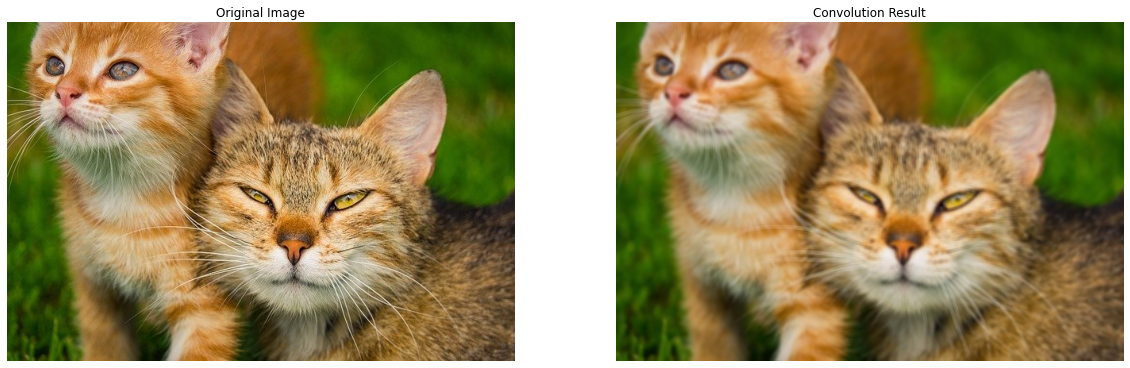

In [ ]:
filename = 'kitten.jpg'
image = cv2.imread(filename)

dst = cv2.filter2D(image, ddepth = -1, kernel = kernel)

plt.figure(figsize = [20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(image[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.axis('off'); plt.imshow(dst[:,:,::-1]);   plt.title("Convolution Result");

# 2. Box Blur

In the previous example, we saw how to create a smoothing filter by convolving the image with a 5x5 kernel. The 3x3 version of that kernel looks like this.

$$
\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
$$

The box kernel weights the contribution of all pixels in the neighborhood equally. As shown in the previous example, we can create this kernel and apply it to this image using `filter2D()`. Since this is a frequently used operation, OpenCV provides a convenience function for performing this operation (`blur()`)

## 2.1 Box Blur in OpenCV

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst = cv2.blur(src, ksize[, dst[, anchor[, borderType]]])
```

**`dst`**	output image of the same size and type as src.

The function has **2 required input arguments**:

1.  **`src`**	input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
2.  **`ksize`**	blurring kernel size.

Here, the blur function assumes the kernel is a normalized box kernel.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`blur()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

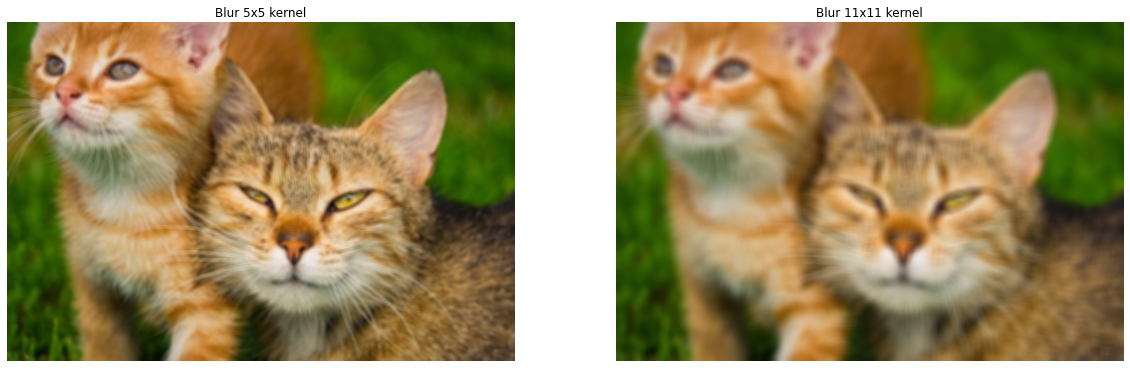

In [ ]:
# Apply a box filter - kernel size 5.
box_blur1 = cv2.blur(image, (5,5))

# Apply a box filter - kernel size 11.
box_blur2 = cv2.blur(image, (11,11))

# Display.
plt.figure(figsize = (20, 10))
plt.subplot(121); plt.axis('off'); plt.imshow(box_blur1[:,:,::-1]); plt.title('Blur 5x5 kernel')
plt.subplot(122); plt.axis('off'); plt.imshow(box_blur2[:,:,::-1]); plt.title('Blur 11x11 kernel');

# 3. Gaussian Blur

Unlike the box kernel, the Gaussian kernel is not uniform. The middle pixel gets the maximum weight while the pixels farther away are given less weight. A Gaussian Blur kernel weights the contribution of a neighboring pixel based on a Gaussian distribution. The Gaussian 5x5 kernel shown below is an approximation to the 2D Gaussian distribution with ${\sigma}=1$. A large value of ${\sigma}$ would add more weight to the edges of the kernel and therefore have a stronger blurring effect, while a smaller value of ${\sigma}$ would narrow the blurring effect. The size of the kernel also determines the amount of blurring. A larger kernel (with the same value of sigma) will blur the image more than a smaller kernel.

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m8-01-gaussian-kernel-distribution.png" alt="c0-m8-01-gaussian-kernel-distribution.png">
</center>
<br>

An image blurred using the Gaussian kernel looks less blurry compared to a box kernel of the same size. A small amount of Gaussian blurring is frequently used to remove noise from an image. It is also applied to the image prior to noise-sensitive image filtering operations. For example, the Sobel kernel used for calculating the derivative of an image is a combination of a Gaussian kernel and a finite difference kernel.

## 3.1 Gaussian Blur in OpenCV

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
```

**`dst`**	output image of the same size and type as src.

The function has **3 required input arguments**:

1. **`src`**	input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
2. **`ksize`**	Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.
3. **`sigmaX`**	Gaussian kernel standard deviation in X direction.

Optional arguments include:

- **`sigmaY`**	Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively; to fully control the result regardless of possible future modifications of all these semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.
- **`borderType`**	pixel extrapolation method.

$$Sigma = 0.3 * ((ksize - 1) * 0.5-1) + 0.8$$

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`GaussianBlur()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Gaussian Blur and effect of Kernel Size</font>

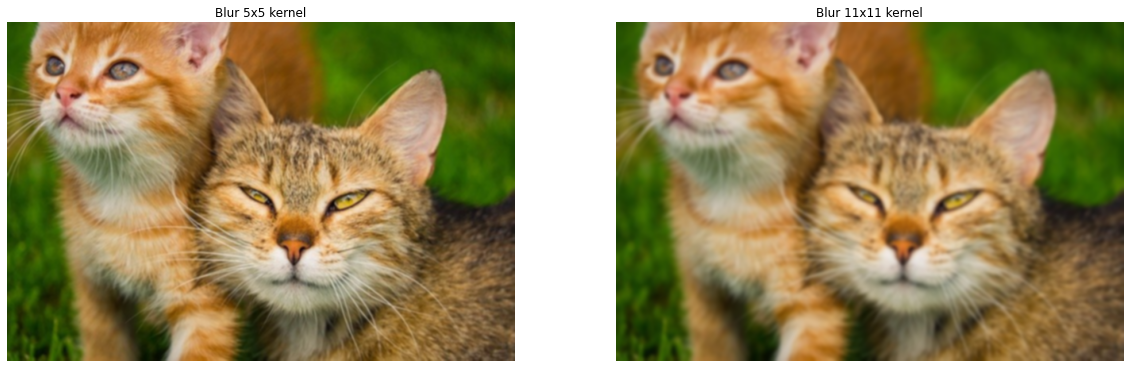

In [ ]:
# Apply Gaussian blur.
gaussian_blur1 = cv2.GaussianBlur(image, (5,5), 0, 0)
gaussian_blur2 = cv2.GaussianBlur(image, (11,11), 0, 0)

# Display.
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(gaussian_blur1[:,:,::-1]); plt.title('Blur 5x5 kernel')
plt.subplot(122); plt.axis('off'); plt.imshow(gaussian_blur2[:,:,::-1]); plt.title('Blur 11x11 kernel');

### <font style="color:rgb(50,120,230)">Comparing Box and Gaussian Blur</font>

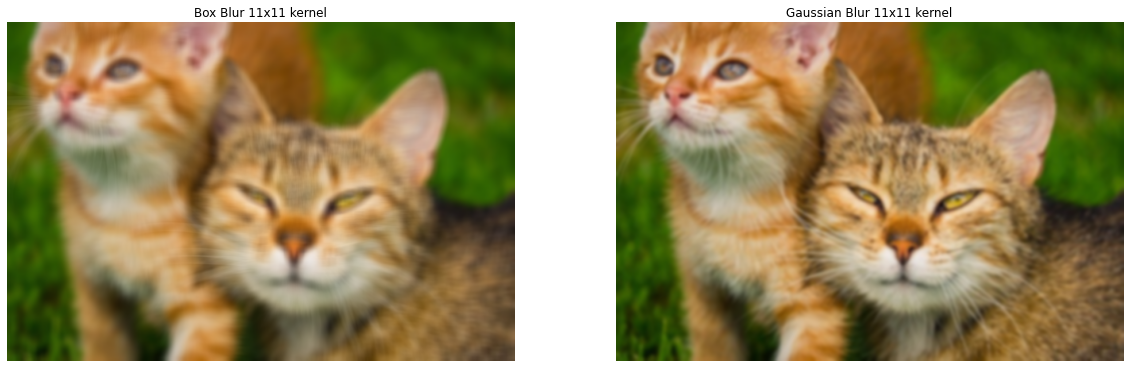

In [ ]:
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(box_blur2[:,:,::-1]);      plt.title('Box Blur 11x11 kernel')
plt.subplot(122); plt.axis('off'); plt.imshow(gaussian_blur2[:,:,::-1]); plt.title('Gaussian Blur 11x11 kernel');

### <font style="color:rgb(50,120,230)">Gaussian Blur and effect of sigma ${\sigma}$</font>

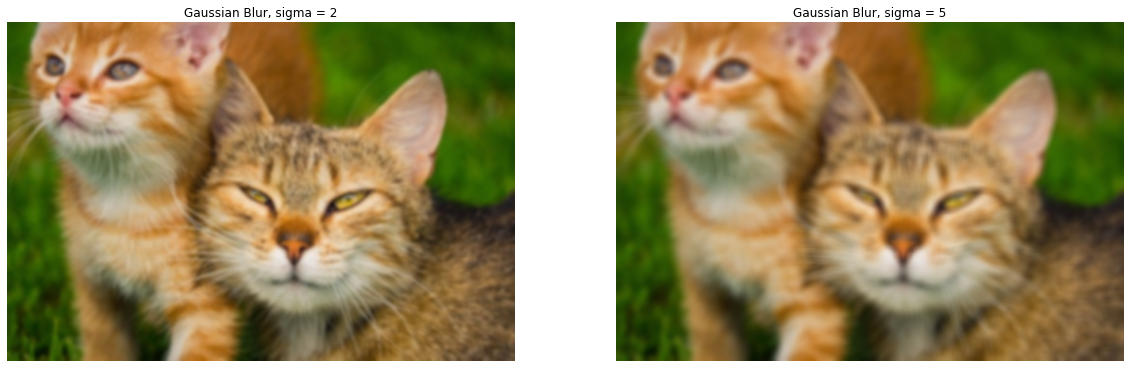

In [ ]:
# Specifying sigmax = 0 and sigmay = 0, will compute a sigma of 2 for a 11x11 kernal
gaussian_blur3 = cv2.GaussianBlur(image, (11,11), 0, 0)
# Here we are explicity setting the sigma values to be very large.
gaussian_blur4 = cv2.GaussianBlur(image, (11,11), 5, 5)

# Display.
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(gaussian_blur3[:,:,::-1]); plt.title('Gaussian Blur, sigma = 2')
plt.subplot(122); plt.axis('off'); plt.imshow(gaussian_blur4[:,:,::-1]); plt.title('Gaussian Blur, sigma = 5');

# 4. Image Sharpening

We can sharpen an image with the following 2D-convolution kernel.

$$
\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}
$$


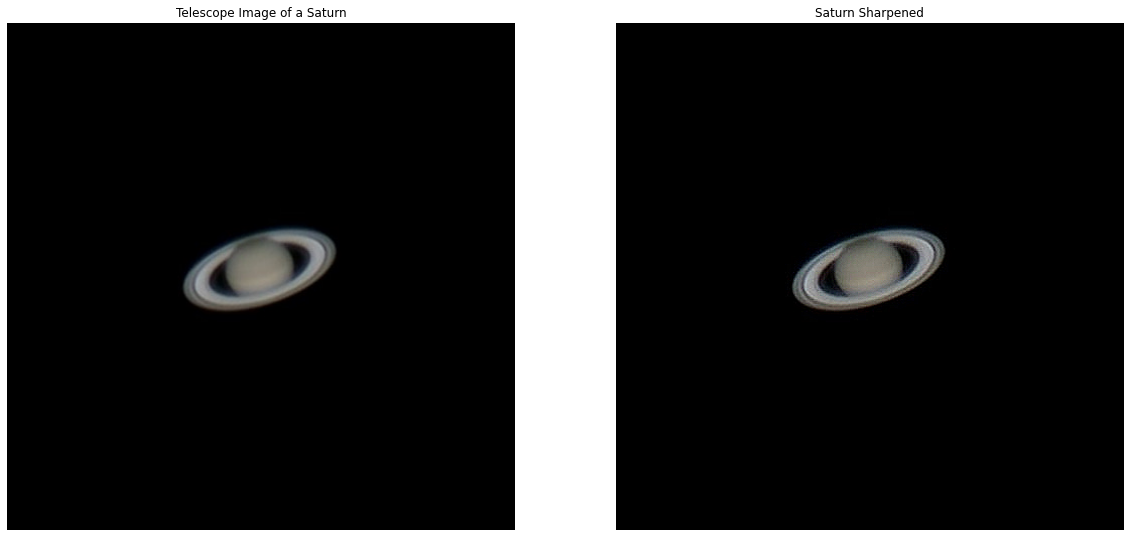

In [ ]:
saturn = cv2.imread('saturn.jpg')

# Define a sharpening kernel.
kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

saturn_sharp = cv2.filter2D(saturn, ddepth = -1, kernel = kernel)

plt.figure(figsize = (20, 15))
plt.subplot(121); plt.axis('off'); plt.imshow(saturn[:,:,::-1]);       plt.title('Telescope Image of a Saturn')
plt.subplot(122); plt.axis('off'); plt.imshow(saturn_sharp[:,:,::-1]); plt.title('Saturn Sharpened');

### <font style="color:rgb(50,120,230)">Recovering Sharpness from Gaussian Blur</font>

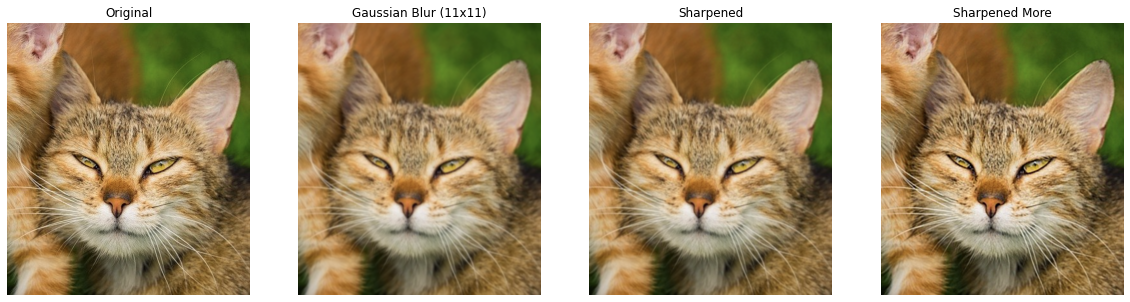

In [ ]:
image = cv2.imread('kitten_zoom.png')

gaussian_blur = cv2.GaussianBlur(image, (11,11), 0, 0)

# Sharpening kernel.
kernel1 = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

# More extreme sharpening kernel.
kernel2 = np.array([[0,  -4,  0],
                   [-4,  17, -4],
                   [ 0,  -4,  0]])

# Apply sharpening.
image_sharp1 = cv2.filter2D(gaussian_blur, ddepth = -1, kernel = kernel1)
image_sharp2 = cv2.filter2D(gaussian_blur, ddepth = -1, kernel = kernel2)

# Display.
plt.figure(figsize = (20,10))
plt.subplot(141); plt.axis('off'); plt.imshow(image[:,:,::-1]);         plt.title('Original')
plt.subplot(142); plt.axis('off'); plt.imshow(gaussian_blur[:,:,::-1]); plt.title('Gaussian Blur (11x11)')
plt.subplot(143); plt.axis('off'); plt.imshow(image_sharp1[:,:,::-1]);  plt.title('Sharpened')
plt.subplot(144); plt.axis('off'); plt.imshow(image_sharp2[:,:,::-1]);  plt.title('Sharpened More');